In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import copy

In [2]:
def check_kw_freq(df, kws: list, op = 'or', attr = 'JOB_DESCRIPTION', verbose = False):
    
    kw_booltable = df[attr].str.contains(kws[0])
    for i in range(1, len(kws)):
        if op == 'or':
            kw_booltable =   kw_booltable | df[attr].str.contains(kws[i])
        else:
            kw_booltable =   kw_booltable & df[attr].str.contains(kws[i])
    
    if verbose:
        return kw_booltable
    else:
        return kw_booltable.sum()

In [4]:
postings_data = pd.read_csv('../data/Lightcast, UK Postings Sample.csv', low_memory=False)
postings_data.columns

Index([' ', 'POSTED', 'TITLE_NAME', 'SOC_4', 'SOC_4_NAME', 'SOC_3',
       'SOC_3_NAME', 'SOC_2', 'SOC_2_NAME', 'LOT_OCCUPATION_NAME',
       'LOT_CAREER_AREA_NAME', 'CITY_NAME', 'NUTS1_NAME', 'NUTS3_NAME',
       'TTWA_NAME', 'COUNTRY_NAME', 'COMPANY_NAME', 'COMPANY_IS_STAFFING',
       'UK_SIC_2', 'INDUSTRY', 'IS_INTERNSHIP', 'IS_REMOTE',
       'SPECIALIZED_SKILLS_NAME', 'COMMON_SKILLS_NAME', 'SOFTWARE_SKILLS_NAME',
       'CERTIFICATIONS_NAME', 'EDULEVELS_NAME_MIN', 'SALARY',
       'JOB_DESCRIPTION'],
      dtype='object')

In [ ]:
# Reformat data type of columnns 

for sk in ['SPECIALIZED_SKILLS_NAME', 'COMMON_SKILLS_NAME','SOFTWARE_SKILLS_NAME' ]:
    postings_data[sk] = postings_data[sk].astype(str)

postings_data['POSTED'] = pd.to_datetime(postings_data['POSTED'])
postings_data['JOB_DESCRIPTION'] = postings_data['JOB_DESCRIPTION'].str.lower()

N_jobs, N_attr = postings_data.shape
print('fraction of jobs without degree requirement: ', postings_data['EDULEVELS_NAME_MIN'].isnull().sum()/N_jobs)

In [65]:
remote_inds = [index for index, value in enumerate(postings_data['IS_REMOTE']) if value==True]

<AxesSubplot:xlabel='POSTED,POSTED'>

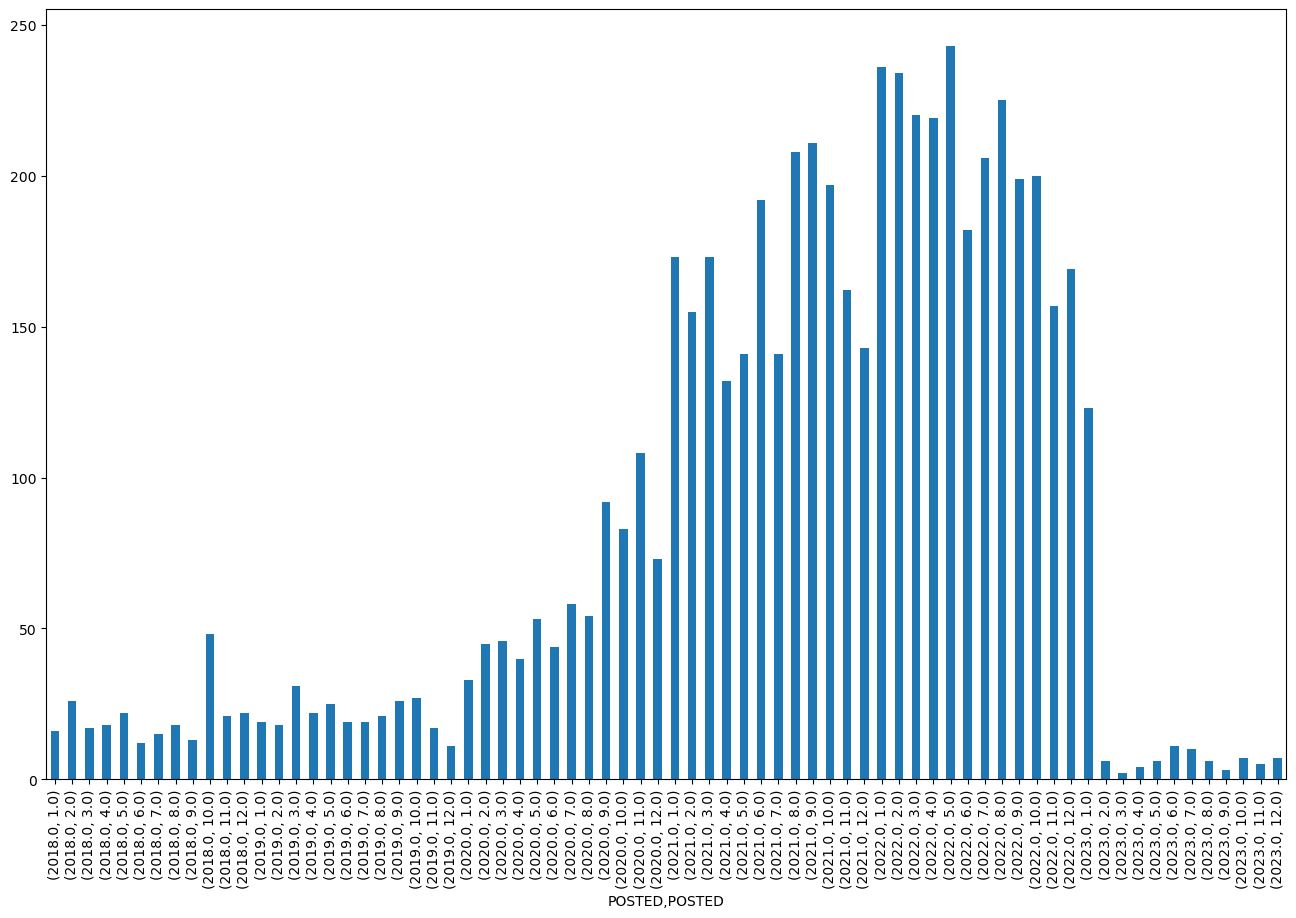

In [66]:
fig = plt.figure(figsize = [16,10])
postings_data['POSTED'][remote_inds].groupby([postings_data['POSTED'].dt.year, postings_data['POSTED'].dt.month]).count().plot(kind="bar")

In [67]:
datesorted_remote = postings_data['POSTED'][remote_inds].sort_values()
counts = [i for i in range(1,len(remote_inds)+1)]

Text(0, 0.5, 'Cumulative number of remote job postings')

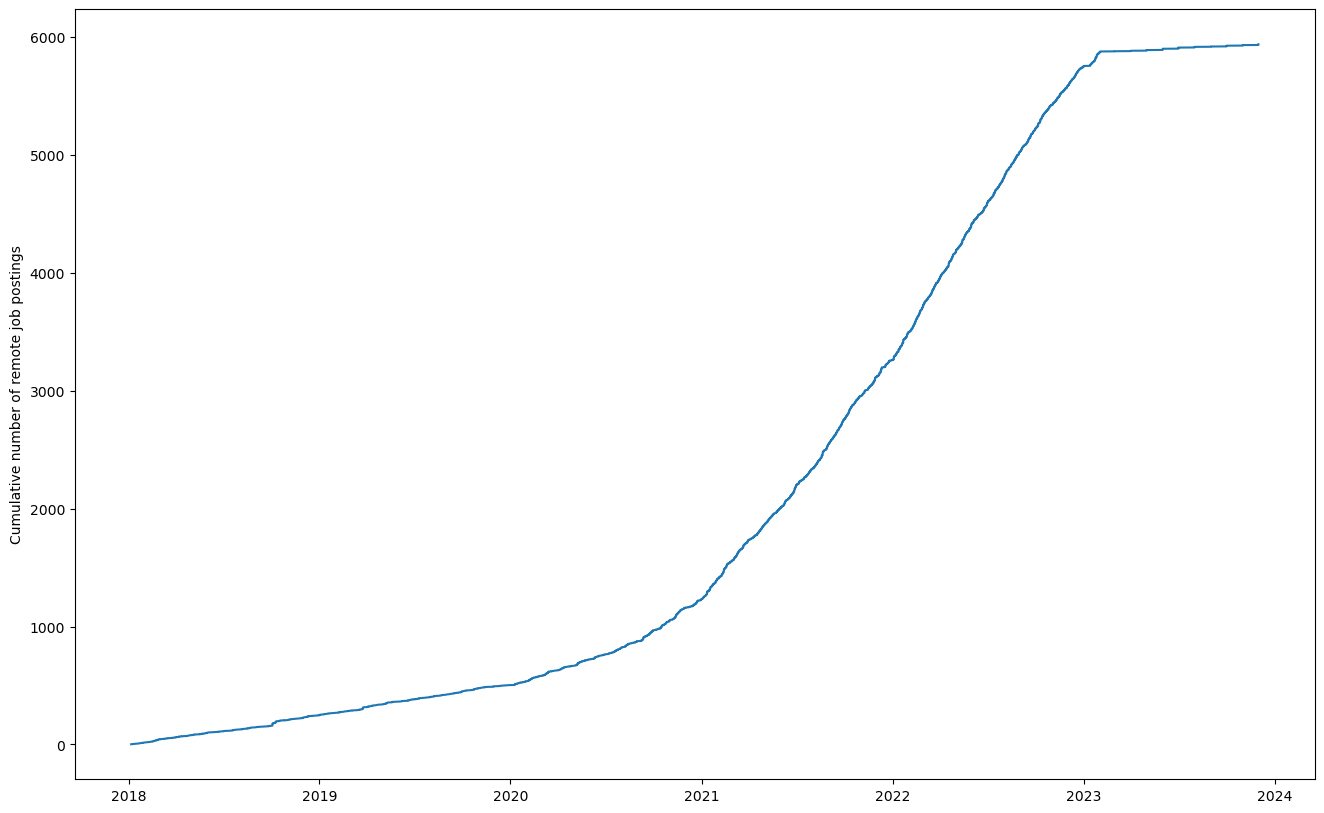

In [68]:
fig = plt.figure(figsize = [16,10])
plt.plot(datesorted_remote,counts)
plt.ylabel('Cumulative number of remote job postings')

In [89]:
hi_eds = ["Bachelor's or equivalent","Master's or equivalent",'Ph.D. or equivalent']
lo_eds = ['A-levels or equivalent','Up to GCSEs or equivalent', 'Foundation/HNC/HND or equivalent']

In [91]:
intern_inds = [index for index, value in enumerate(postings_data['IS_INTERNSHIP']) if value==True]
no_edu_inds = [index for index, value in enumerate(postings_data['EDULEVELS_NAME_MIN']) if pd.isnull(value)]
hi_edu_inds = [index for index, value in enumerate(postings_data['EDULEVELS_NAME_MIN']) if value in hi_eds]
lo_edu_inds = [index for index, value in enumerate(postings_data['EDULEVELS_NAME_MIN']) if value in lo_eds]
print(len(no_edu_inds),len(hi_edu_inds),len(lo_edu_inds))

80039 11168 8804


<AxesSubplot:xlabel='POSTED,POSTED'>

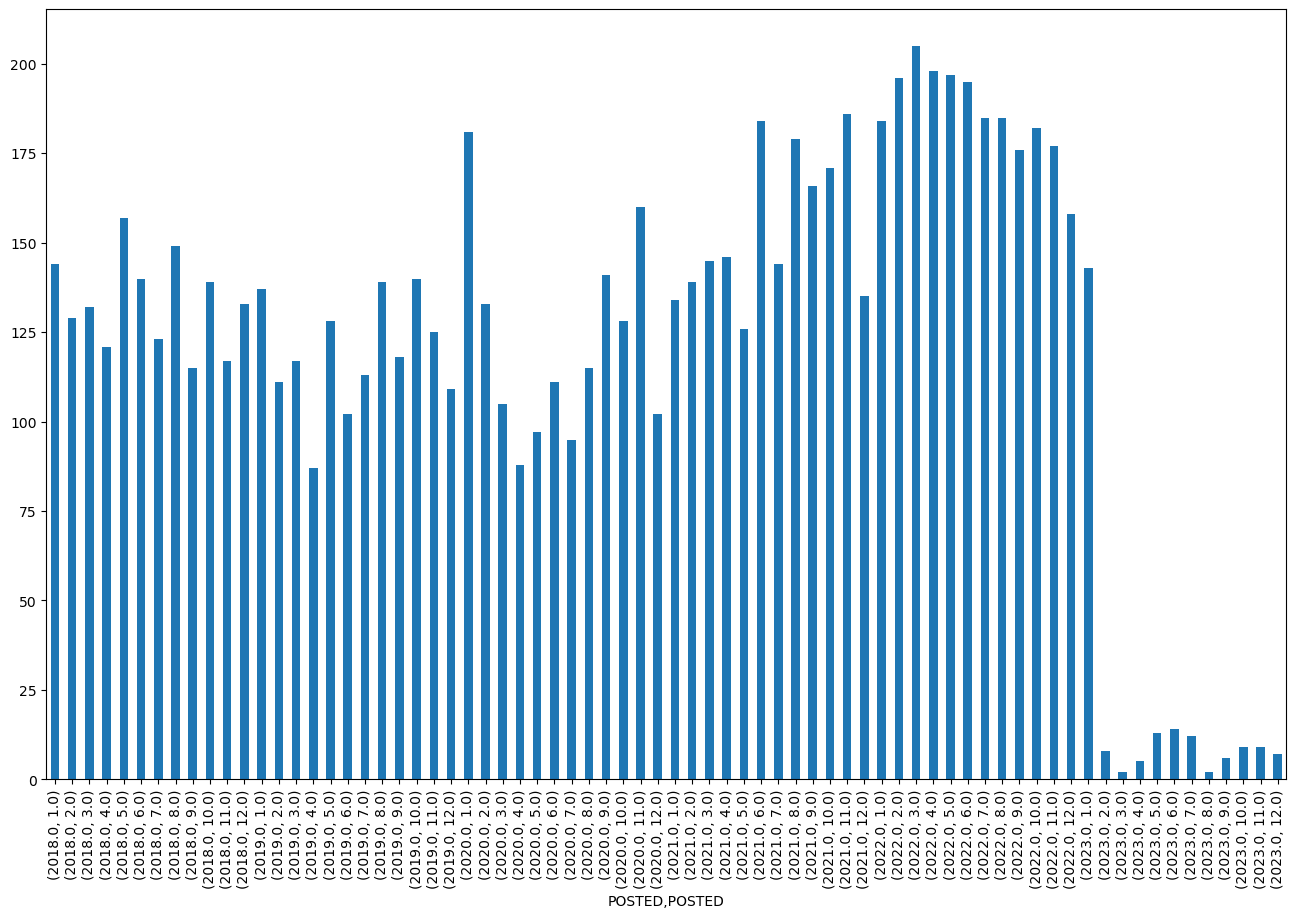

In [101]:
fig = plt.figure(figsize = [16,10])
postings_data['POSTED'][lo_edu_inds].groupby([postings_data['POSTED'].dt.year, postings_data['POSTED'].dt.month]).count().plot(kind="bar")

In [99]:
datesorted_hied = postings_data['POSTED'][hi_edu_inds].sort_values()
counts = [i for i in range(1,len(hi_edu_inds)+1)]

Text(0, 0.5, 'Cumulative number of remote job postings')

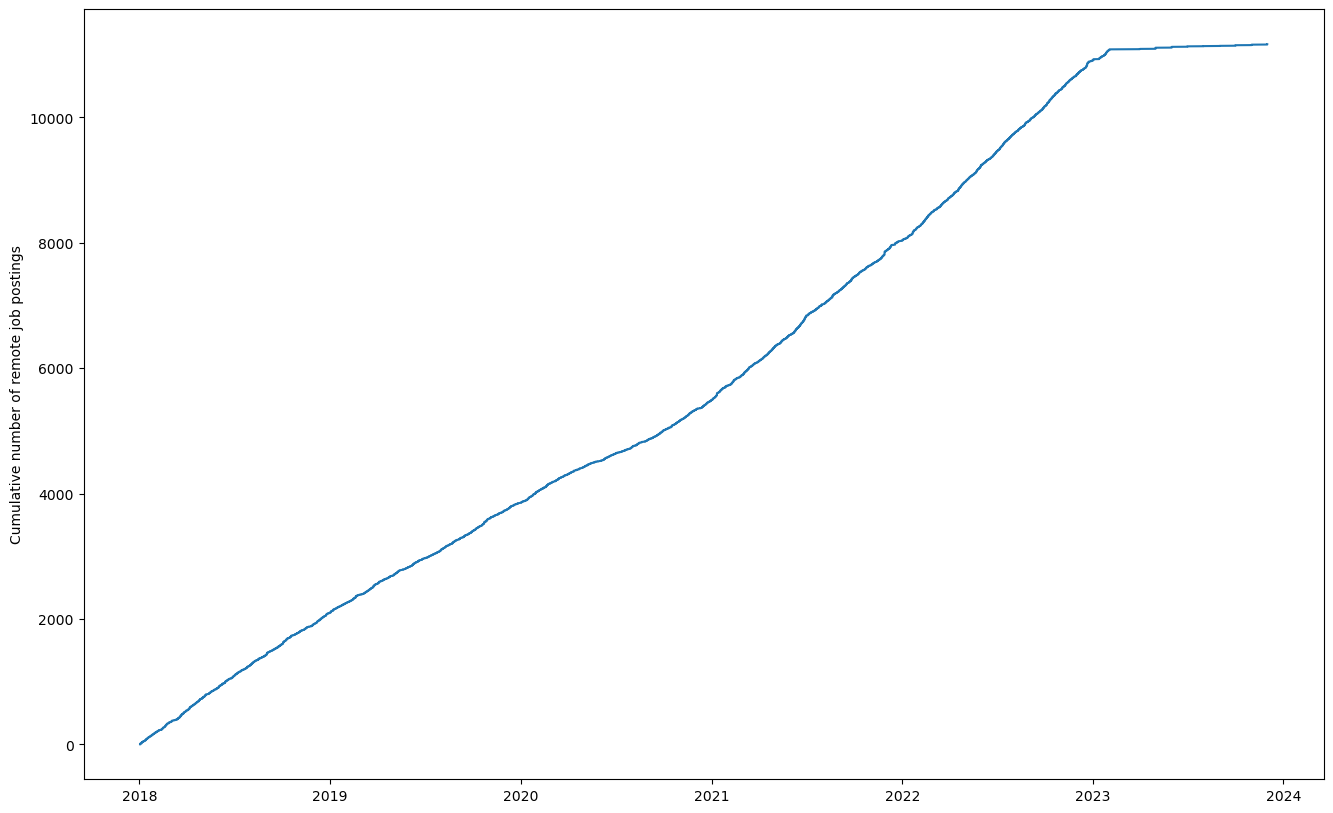

In [100]:
fig = plt.figure(figsize = [16,10])
plt.plot(datesorted_hied,counts)
plt.ylabel('Cumulative number of remote job postings')

In [108]:
freqtab = pd.crosstab(postings_data['EDULEVELS_NAME_MIN'],pd.PeriodIndex(postings_data['POSTED'],freq='M'))
freqtab

col_0,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,...,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12
EDULEVELS_NAME_MIN,,,,,,,,,,,,,,,,,,,,,
A-levels or equivalent,32,32,29,35,40,36,32,32,28,30,...,1,2,0,1,5,0,1,1,3,2
Bachelor's or equivalent,157,146,142,163,147,154,144,140,144,160,...,2,5,14,10,8,4,2,9,9,5
Foundation/HNC/HND or equivalent,25,23,23,14,23,20,15,23,25,25,...,1,2,1,2,1,0,0,3,2,0
Master's or equivalent,18,12,27,15,22,13,18,15,16,12,...,0,0,5,4,0,0,1,1,0,0
Ph.D. or equivalent,11,10,13,14,6,15,11,12,9,12,...,0,0,0,0,0,0,1,0,0,1
Up to GCSEs or equivalent,87,74,80,72,94,84,76,94,62,84,...,0,1,12,11,6,2,5,5,4,5


In [109]:
freqtab.iloc[0]

col_0
2018-01    32
2018-02    32
2018-03    29
2018-04    35
2018-05    40
           ..
2023-08     0
2023-09     1
2023-10     1
2023-11     3
2023-12     2
Freq: M, Name: A-levels or equivalent, Length: 72, dtype: int64

In [ ]:
postings_datacp = postings_data.copy()

for i in postings_datacp['EDULEVELS_NAME_MIN']:
    if pd.isnull(i):
        i = 'missing'


In [111]:
postings_datacp = postings_data.copy()

In [116]:
for i in postings_datacp['EDULEVELS_NAME_MIN']:
    if pd.isnull(i):
        i = 'missing'
        print(i)

missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing


In [117]:
postings_datacp['EDULEVELS_NAME_MIN']

0         Bachelor's or equivalent
1                              NaN
2                              NaN
3                              NaN
4                              NaN
                    ...           
100006                         NaN
100007    Bachelor's or equivalent
100008                         NaN
100009      A-levels or equivalent
100010                         NaN
Name: EDULEVELS_NAME_MIN, Length: 100011, dtype: object